<p align="right"><i>Data Analysis for the Social Sciences - Part II - 2021-11-15</i></p>

# Quantitative Data Analysis

Welcome to Part II of Data Analysis for the Social Sciences. In this stream - Quantitative Data Analysis - we will conduct a range of statistical analyses in order to answer the following research question:

<p><center><i>Is religion associated with differences in sexual attitudes and behaviours among British people?</i></center></p>

### Aims

This lesson - **Univariate Analysis** - has two aims:
1. Demonstrate how to analyse categorical and numeric variables individually.
2. Cultivate your computational skills through the use of the statistical programming langauge *R*. For example, there are a number of opportunities for you to amend or write R syntax (code).

### Lesson details

* **Level**: Introductory, for individuals with no prior knowledge or experience of quantitative data analysis.
* **Duration**: 45-60 minutes.
* **Pre-requisites**: None.
* **Programming language**: R.
* **Learning outcomes**:
	1. Understand how to use R for conducting univariate data analysis.
	2. Understand how to select and apply common data analysis techniques for categorical and numeric variables.

## Guide to using this resource

This learning resource was built using <a href="https://jupyter.org/" target=_blank>Jupyter Notebook</a>, an open-source software application that allows you to mix code, results and narrative in a single document. As <a href="https://jupyter4edu.github.io/jupyter-edu-book/" target=_blank>Barba et al. (2019)</a> espouse:
> In a world where every subject matter can have a data-supported treatment, where computational devices are omnipresent and pervasive, the union of natural language and computation creates compelling communication and learning opportunities.

If you are familiar with Jupyter notebooks then skip ahead to the main content (*Analysing Data*). Otherwise, the following is a quick guide to navigating and interacting with the notebook.

### Interaction

**You only need to execute the code that is contained in sections which are marked by `In []`.**

To execute a cell, click or double-click the cell and press the `Run` button on the top toolbar (you can also use the keyboard shortcut `Shift + Enter`).

Try it for yourself:

In [51]:
name <- readline(prompt="Enter name: ")
print(paste("Hi,", name, "enjoy learning more about R and exploring data!"))

Enter name: Diarmuid
[1] "Hi, Diarmuid enjoy learning more about R and exploring data!"


Notebooks are sequential, meaning code should be executed in order (top to bottom). For example, the following code won't work:

In [53]:
x * 5

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


As the error message suggests, there is no object (variable) called `x`, therefore we cannot do any calculations with it. 

Let's try a sequential approach:

In [54]:
x <- 10 # create an object called 'x' and give it the value '10'

In [55]:
x * 5 # multiply 'x' by 5

[1] 50

### Learn more

Jupyter notebooks provide rich, flexible features for conducting and documenting your data analysis workflow. To learn more about additional notebook features, we recommend working through some of the <a href="https://github.com/darribas/gds19/blob/master/content/labs/lab_00.ipynb" target=_blank>materials</a> provided by Dani Arribas-Bel at the University of Liverpool. 

### Learner input

Throughout the lessons there times when you need to do the following activities:
* **TASK:** A coding task for you to complete (e.g. analyse different variables).
* **QUESTION:** A question regarding your interpretation of some code or a technique (e.g. what is the piece of code doing?).
* **EXERCISE:** A data analysis challenge for you to complete.

## Analysing Data

Once we have collected and explored our data, we can turn to the interesting part: analysis. Our ultimate aim is to answer the research question accurately: to do so we need to produce summaries of our key variables. In our case we need to analyse variables relating to religious beliefs and sexual attitudes/behaviours. 

How do we know which summaries to choose? We need to look at the **level of measurement** of each variable: are we dealing with categorical (e.g., marital status) or numeric (e.g., income) variables? We covered level of measurement in Week 2 but here is a quick refresher: 

![Differentiation of numeric and categorical variables](./images/lvl_msr_diagr.png)

Source: [https://maczokni.github.io/MSCD_labs/week2.html#univariate-analysis](https://maczokni.github.io/MSCD_labs/week2.html#univariate-analysis)

**Numeric variables** measure the amount or magnitude of some characteristic | attribute | outcome. For example, how much income a person receives from their part-time job; how many people are classed as homeless in Scotland in a given year.

**Categorical variables** measure the presence of some characteristic | attribute | outcome. For example, a person's country of birth; marital status. These are examples of *nominal* categorical variables. However there is another type of categorical variable that also captures the rank or ordering of the categories. For example, a student's degree classification; social class; agreement with a statement ("strongly agree", "agree", "disagree"). These are examples of *ordinal* categorical variables.

The analytical techniques we use depend on whether we are dealing with a numeric or categorical variable. However the aims of our analysis are similar:
1. We want to summarise the **central tendency** of the values
2. We want to summarise the **distribution** of the values

### Central tendency

Central tendency conveys what the *typical observation* looks like for a variable (Fogarty, 2019). There are a number of different measure of central tendency but the three most recognisable are:
* **Mode** - the most common value of a variable.
* **Median** - the middle value in a variable's distribution, where an equal number of observations lie above and below this value.
* **Mean** - the average value of a variable. 

We'll clarify what is meant by each of these measures when we encounter some examples in the *Natsal* data.

### Distribution

The pattern of variation in the values of a variable is called a *distribution*. For example, here is the distribution of median (typical) age for all countries in 2015:

![](./images/median-age-2015.png)

We observe that the values of this variable are quite uniformly distributed; that is, each median age is as likely to be observed as any other (with the notable exception of ages < 15 and ages > 45).

Observing the full distribution of values is important but there are also a number of summary statistics that describe interesting features of a distribution. These are called **measures of dispersion** and some of the most commonly encountered are:
* **Minimum** - the lowest value observed
* **Maximum** - the highest value observed
* **Range** - the difference between the minimum and maximum
* **Standard deviation** - the average difference a value is from the mean

Many of these really only apply to numeric variables.

For example, here are some measures of dispersion of typical ages:

In [56]:
country_ages <- read.csv("./data/median-age-our-world-in-data.csv", header=TRUE, na="NA")
country_ages_2015 <- country_ages[country_ages$Year==2015,]
summary(country_ages$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.30   21.00   31.20   31.93   42.00   56.80 

The lowest typical age is 14 years old (i.e., roughly half of the population are younger, and half older than this age), while the highest typical age is 57 years old.

We observe that the mean age is 32 years old. To decide whether this is a good representation of the typical value for this variable, we calculate the standard deviation:

In [57]:
sd(country_ages$Age)

[1] 11.13444

On average, a country is within 11 years of the mean age. When we consider this statistic in light of the shape of the distribution (see above), we can conclude the typical age varies considerably across countries: there are at least 50 countries with a median age < 20 years old, and at least 40 with a median age > 40 years old.

Therefore the mean and median summary statistics are not very representative of the typical country with regards to age.

### Univariate analysis

As you may have guessed, *uni* variate analysis simply involves the analysis of *one* variable at a time. We may be interested in many variables in our study but we produce summaries of them separately, rather than trying to analyse them jointly (like in a correlation analysis).

One variable, sounds simple right? Well yes, as long as:
* You have variables that measure the concept you are interested in.
* You recognise the data type (level of measurement) of each variable.

### Importing data

The first step is to import the *Natsal-3* data for analysis.

In [58]:
natsal <- read.table("./data/natsal_3_teaching_open.tab", header=TRUE, na="NA", sep="\t")
head(natsal) # view the first six observations

,agrp,rsex,ethnicgrpr,sexidr,rnssecgp_6,adj_imd_quintile,rwcasual,snnolov,snpres,snold,snsexdrv,snmedia,snearly,attconservative,dage1ch,disabil2,depscr,religimp,relstatr,total_wt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2,1,1,1,4,3,1,4,2,2,2,2,1,1.3665446,-1,1,0,2,7,0.4605145
2,3,2,1,1,5,3,5,2,3,4,4,4,3,-2.3896493,-1,1,0,4,2,1.9239441
3,1,2,1,1,8,4,3,2,4,4,2,2,2,-0.7515043,-1,1,0,3,3,1.0208558
4,4,2,2,2,5,5,1,5,4,8,3,1,1,NA,28,1,1,1,NA,0.8074293
5,2,1,2,2,1,5,1,5,8,8,4,8,1,NA,23,1,0,1,1,1.0390816
6,1,2,2,1,8,4,1,5,1,4,2,2,2,0.9944980,-1,1,-1,1,7,0.5381795


Let's get a list of variable names and see which ones relate to our two concepts (*religious beliefs* and *sexual attitudes/behaviours*).

In [59]:
names(natsal)

[1] "agrp"             "rsex"             "ethnicgrpr"       "sexidr"          
 [5] "rnssecgp_6"       "adj_imd_quintile" "rwcasual"         "snnolov"         
 [9] "snpres"           "snold"            "snsexdrv"         "snmedia"         
[13] "snearly"          "attconservative"  "dage1ch"          "disabil2"        
[17] "depscr"           "religimp"         "relstatr"         "total_wt"

After looking up the [codebook](./codebook/8786_natsal_open_codebook_feb21.pdf), there are two variables definitely of interest:
* `attconservative` is a measure of how conservative a respondent's attitudes to sex are: higher scores indicate more conservative attitudes. Therefore this is a numeric variable, specifically an interval variable.
* `religimp` is a measure of the current importance of religious beliefs to a respondent: responses range from "Very important" to "Not important at all". Therefore this is a categorical variable, specifically an ordinal variable.

Let's focus on summarising the values of each of these variables.

### Labelling values

You may have noticed that it is difficult / impossible to know what the values of a variable mean without the [codebook](./codebook/8786_natsal_open_codebook_feb21.pdf). This isn't much of a problem with numeric variables, but is when dealing with categorical variables.

We can make things easier for ourselves by attaching labels to specific values. 

Consider the age group variable (`agrp`):

In [60]:
table(natsal$agrp)


   1    2    3    4    5    6 
 960 1027  533  491  404  384 

We can probably infer that the value "1" refers to the youngest age group and so on. However it is inefficient to have to consult the codebook to learn what age group specifically is represented by this value (it is "16-24"). Therefore let's use *R* to attach labels:

In [61]:
natsal$agrp <- factor(natsal$agrp, levels = c(1,2,3,4,5,6), labels = c("16-24", "25-34", "35-44", 
                                                                       "45-54", "55-64", "65-74"))

Now we can see the labels when we view the values of the variable:

In [62]:
table(natsal$agrp)


16-24 25-34 35-44 45-54 55-64 65-74 
  960  1027   533   491   404   384 

**TASK:** Execute the code below to add labels for other variables.

In [63]:
natsal$religimp <- factor(natsal$religimp, levels = c(1,2,3,4,9), labels = c("Very important", "Fairly important", 
                                                                             "Not very important", "Not important at all", "Not answered"))

In [64]:
natsal$rsex <- factor(natsal$rsex, levels = c(1,2), labels = c("Male", "Female"))

In [65]:
natsal$ethnicgrp <- factor(natsal$ethnicgrp, levels = c(1,2,9), labels = c("White", "Non-white", "Not answered"))

### Summarising categorical variables

One of the core ways of analysing a categorical variable is to examine the frequency with which each category occurs. That is, we look at the variable's *frequency distribution*. Recall that a *distribution* is a summary of the variation in a variable: that is, observations have different values for a variable and these values form a pattern.

In [66]:
table(natsal$agrp)


16-24 25-34 35-44 45-54 55-64 65-74 
  960  1027   533   491   404   384 

In [67]:
table(natsal$religimp)


      Very important     Fairly important   Not very important 
                 550                  935                 1102 
Not important at all         Not answered 
                1194                   18 

The `table()` command is pretty basic but does give us some useful information. For instance we learn that over 2,000 respondents think religion is either not very important or not important at all. The most common category - the **mode** - is "Not important at all".

It would be useful to know the percentage of observations in each category. *R* doesn't make this as easy as we would like but it can be achieved like so:

In [68]:
round(prop.table(table(natsal$religimp)) * 100, 0)


      Very important     Fairly important   Not very important 
                  14                   25                   29 
Not important at all         Not answered 
                  31                    0 

Now we can see that a majority (60%) of respondents think religion is either not very important or not important at all, and just 14% think is very important.

Finally, summarising the distribution of a categorical variable is often best done through a graph or visualisation. A common graph type for categorical variables is a **bar chart**.

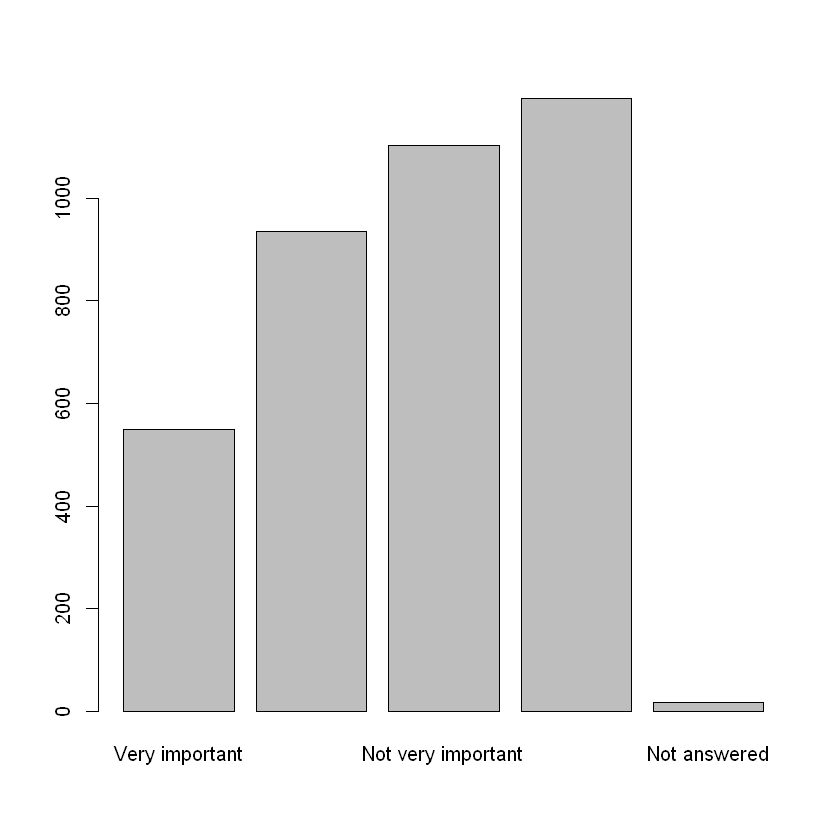

In [69]:
barplot(table(natsal$religimp))

We can clearly see the pattern in the distribution using a bar chart: respondents are more likely to say religion is unimportant.

Don't worry about the basic presentation of the graph: we will produce more visually appealing graphs in later weeks.

**TASK:** Use frequency tables and bar charts to summarise the `agegrp` and `rsex` variables.

In [70]:
# INSERT CODE HERE

### Summarising numeric variables

One of the core ways of analysing a numeric variable is to calculate measures of central tendency, in particular the **mean** and **median**:

In [71]:
mean(natsal$dage1ch)

[1] 15.20032

In [72]:
median(natsal$dage1ch)

[1] 18

Here we see the mean and median values of the "age at birth of first child" variable. The mean represents the average value of this variable and is calculated by adding up all the values and dividing by the number of observations for this variable.

The median represents the middle value: roughly 50% of respondents had a child when they were younger than 18, and 50% when they were older. 

These measures are useful for analysing typical or representative values of variable. However it is also important we consider the distribution of values, so we can assess just *how* useful the mean and median are.

First we can view a summary of the **range** of values of this variable:

In [73]:
summary(natsal$dage1ch)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -1.0    -1.0    18.0    15.2    25.0    99.0 

We get some seemingly nonsensical values for the minimum and maximum: clearly you cannot have a child at "-1" years old, and it is highly unlikely your first child arrives when you turn 99!

Having consulted the codebook, we know that the value "-1" indicates that that this question was not relevant to a respondent, and "99" that a respondent did not answer the question even though it was relevant. Therefore let's drop observations where `dage1ch` equals "-1" or "99".

In [74]:
dage1ch_valid <- subset(natsal, dage1ch > -1 & dage1ch < 99)

In [75]:
summary(dage1ch_valid$dage1ch)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   21.00   24.00   24.84   28.00   40.00 

Now we can see the true range of values.

**QUESTION**: why have the values of the mean and median changed?

A common graph type for numeric variables is a **histogram**.

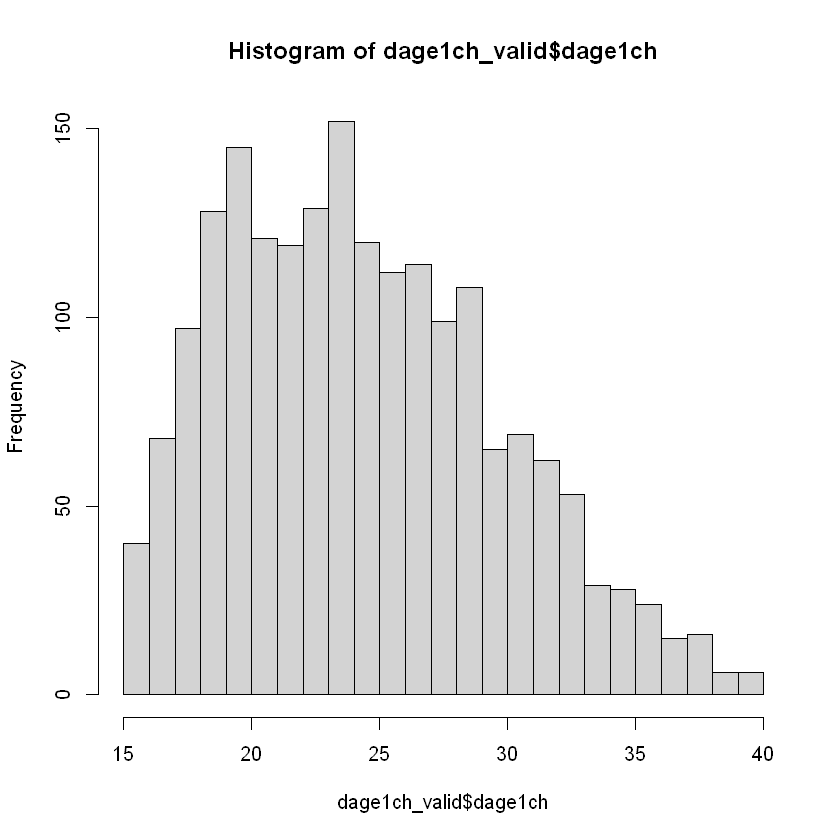

In [76]:
hist(dage1ch_valid$dage1ch, breaks = seq(15, 40, by=1)) # each bar represents a single age

We can clearly see the pattern in the distribution using a histogram: most respondents have their first child between the ages of 18 and 28, with a decreasing likelihood of being in your late thirties when having your first child. 

This type of distribution, where the values are bunched to the left, can be described as being **positively skewed**. That is, there are a small number of "extreme" or high values.

When we have a small range of values for a numeric variable, then a bar chart may also be appropriate:

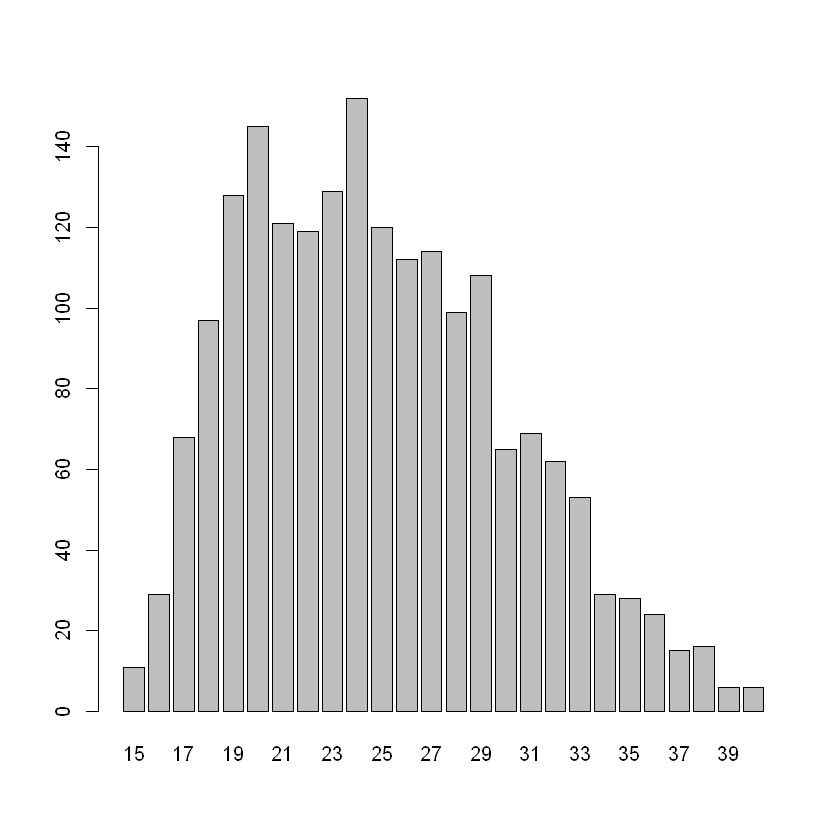

In [77]:
barplot(table(dage1ch_valid$dage1ch))

OK, let's return to our main numeric ariable of interest: `attconservative`

In [78]:
summary(natsal$attconservative)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-3.88938 -0.67900 -0.02177 -0.01728  0.71396  2.59516      299 

In [79]:
mean(natsal$attconservative, na.rm=TRUE) # ignore missing values when calculating the mean

[1] -0.01727981

In [80]:
median(natsal$attconservative, na.rm=TRUE) # ignore missing values when calculating the mean)

[1] -0.02177398

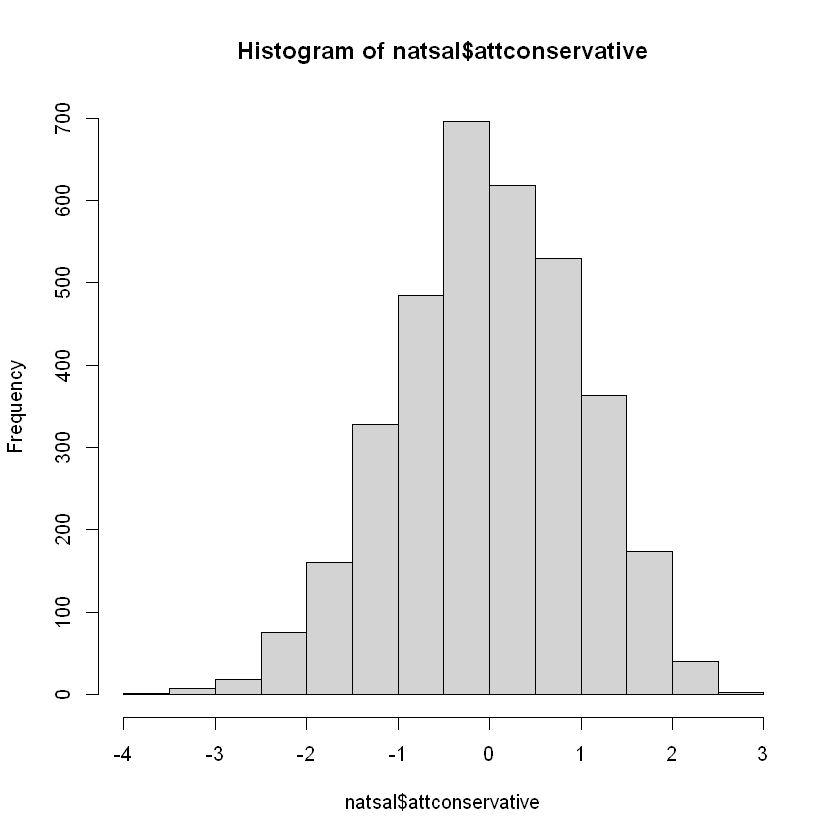

In [81]:
hist(natsal$attconservative)

The exact values of this variable are not inherently meaningful, they simply represent a scale of how conservative a respondent's attitudes to sex are: postive values of this variable indicate a more conservative attitude to sex, negative values a more liberal attitude. The average respondent is slightly conservative in their attitudes to sex, though most respondents have a score slightly below or above 0.

Let's assess the distribution of this variable using some measures of dispersion:

In [82]:
summary(natsal$attconservative)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-3.88938 -0.67900 -0.02177 -0.01728  0.71396  2.59516      299 

In [83]:
sd(natsal$attconservative, na.rm=TRUE)

[1] 1.00745

**QUESTION**: How would you describe how representative the mean/median is for this variable? That is, how closely packed are values around these measures?

## Conclusion

In this lesson we encountered a range of techniques for summarising categorical and numeric variables one at a time.

In this next lesson we focus on summarising the joint distribution of two variables, a technique known as *bivariate* analysis.